<a href="https://colab.research.google.com/github/Swetha-0308/codsoft_taskno.3/blob/main/codsoft_taskno_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS FLOWER CLASSIFICATION**

In [ ]:
# import  librarues for data processing and modelling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#load the data from csv file to pandas dataframe
data= pd.read_csv('/content/IRIS (1).csv')

In [ ]:
# printing the first 5 rows of the dataframe
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#printing the last 10 rows
data.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


data pre-processing


In [ ]:
#checking the number no missing values in each column
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

data analysis

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}}, inplace=True)

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


**data visualization**

In [ ]:
data['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
sns.set()

<Axes: xlabel='species', ylabel='count'>

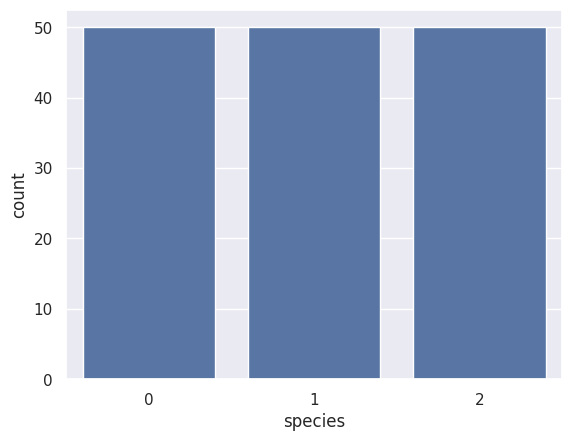

In [ ]:
#plot for species column
sns.countplot(x='species', data=data)

<Axes: xlabel='sepal_length', ylabel='Count'>

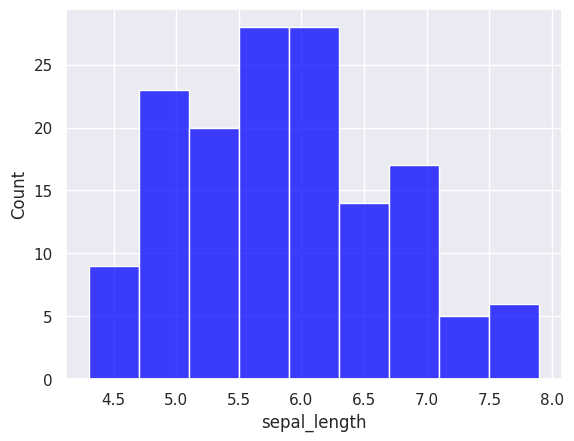

In [ ]:
#built a histogram for sepal_length
sns.histplot(x=data.sepal_length, data=data, color='blue' )

<Axes: xlabel='sepal_width', ylabel='Count'>

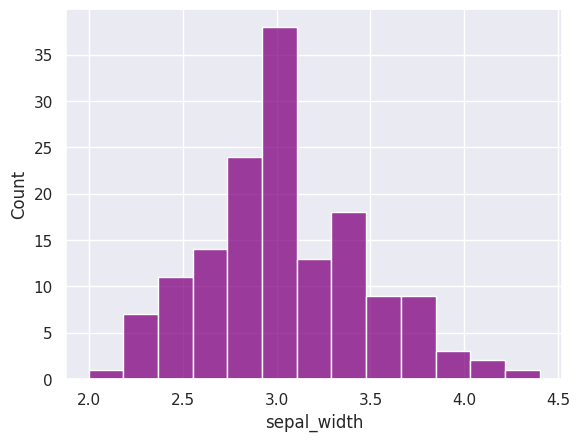

In [ ]:
#built a histogram for sepal_width
sns.histplot(x=data.sepal_width , data=data, color='purple' )

<Axes: xlabel='petal_length', ylabel='Count'>

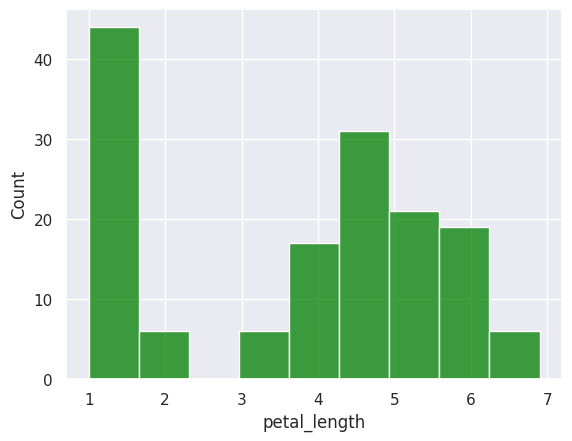

In [ ]:
#built a histogram for petal_length
sns.histplot(x=data.petal_length, data=data, color='green' )

<Axes: xlabel='petal_width', ylabel='Count'>

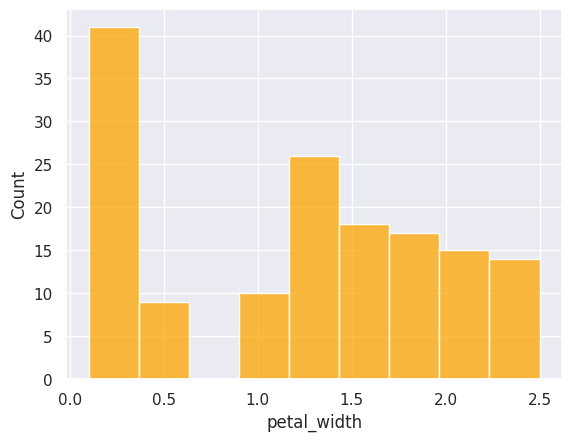

In [ ]:
#built a histogram for petal_width
sns.histplot(x=data.petal_width, data=data, color='orange' )

<Axes: >

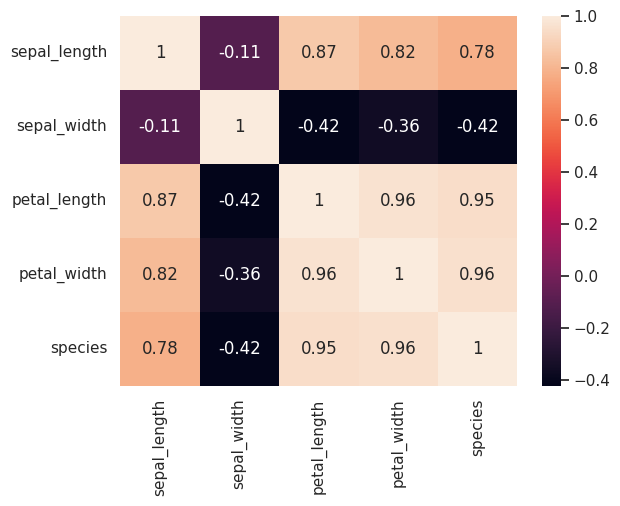

In [ ]:
#correlation in the dataset
corr=data.corr()
sns.heatmap(corr, annot=True)

data preparation

In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
#assigning the predictor and target variable
x= data.drop(columns='species', axis=1)
y= data['species']

In [ ]:
print(x)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [ ]:
x_train, x_test , y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=1)

model building

In [ ]:
# building machine learning model and training them
Model= LogisticRegression()
Model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#evaluating the model to verify the accuracy
print("score for Train data",Model.score(x_train,y_train))

score for Train data 0.9809523809523809


In [ ]:
print("score for Test data",Model.score(x_test,y_test))

score for Test data 0.9777777777777777


In [ ]:
# k-nearest neigbhour
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#build the meachine learinh and train the data
Model2= KNeighborsClassifier()
Model2.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#evaluating the model to verify the accuracy
print("score for Train data",Model2.score(x_train,y_train))
print("score for Test data",Model2.score(x_test,y_test))

score for Train data 0.9523809523809523
score for Test data 0.9777777777777777


model testing


In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#for testing we create a new dataframe with values close to any of our existing data to evaluate
data1= {'sepal_length':[5.2],'sepal_width':[3.6],'petal_length':[1.4],'petal_width':[0.2]}
trail=pd.DataFrame(data1)

In [ ]:
result=Model.predict(trail)
print('result species:', result[0])

result species: 0
